Name: Tushar Muley

Assignment: Project 2 - Metro Bike Sharing Analysis

Date: Feb 6, 2022

### Bike Sharing Analysis

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import math
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [2]:
# setting changes
pd.set_option('display.max_columns', None)

In [3]:
# load data into dataframe by file
df_mbq1 = pd.read_csv('metro_2021/metro-trips-2021-q1.csv')
df_mbq2 = pd.read_csv('metro_2021/metro-trips-2021-q2.csv')
df_mbq3 = pd.read_csv('metro_2021/metro-trips-2021-q3.csv')
df_mbq4 = pd.read_csv('metro_2021/metro-trips-2021-q4.csv')

C:\Users\Tushar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
# check the size of all quarters
df1=len(df_mbq1.index)
df2=len(df_mbq2.index)
df3=len(df_mbq3.index)
df4=len(df_mbq4.index)

In [5]:
print('metro bike q1 file size:', df1)
print('metro bike q2 file size:', df2)
print('metro bike q3 file size:', df3)
print('metro bike q4 file size:', df4)

metro bike q1 file size: 40858
metro bike q2 file size: 59081
metro bike q3 file size: 58411
metro bike q4 file size: 62647


In [6]:
# group the quarters into a single df 
df_metro_bike = df_mbq1.append(df_mbq2, ignore_index=True, sort=False)\
            .append(df_mbq3, ignore_index=True, sort=False)\
            .append(df_mbq4, ignore_index=True, sort=False)

In [15]:
# write the df to a csv file for future needs
df_metro_bike.to_csv('metro_2021/metro_bike_2021.csv', index=False)

In [8]:
print('metro bike combined file size: ', df_metro_bike.shape)

metro bike combined file size:  (220997, 17)


In [9]:
# load station data from different file
df_stations = pd.read_csv('metro_2021/metro-bike-share-stations-2021-10-01.csv')

#### Exploratory Data Analysis (EDA)

In [6]:
# check the data for combined df
df_metro_bike.head()

trip_id  duration     start_time       end_time  start_station  \
0  151713183        17  1/1/2021 1:45  1/1/2021 2:02           3005   
1  151713983         7  1/1/2021 2:35  1/1/2021 2:42           4390   
2  151716483         8  1/1/2021 4:28  1/1/2021 4:36           3052   
3  151721185       208  1/1/2021 4:43  1/1/2021 8:11           3034   
4  151720984       129  1/1/2021 5:53  1/1/2021 8:02           4446   

   start_lat   start_lon  end_station    end_lat     end_lon bike_id  \
0  34.048500 -118.258537         4304  34.062580 -118.290092    5894   
1  34.069271 -118.296593         4456  34.052429 -118.302017   16901   
2  34.051102 -118.264557         4314  34.057709 -118.279762    6005   
3  34.042061 -118.263382         3031  34.044701 -118.252441    5852   
4  34.053230 -118.278419         4446  34.053230 -118.278419   12075   

   plan_duration trip_route_category passholder_type bike_type  \
0              1             One Way         Walk-up  standard   
1            365             One Way     Annual Pass  electric   
2             30             One Way    Monthly Pass  standard   
3              1             One Way         Walk-up  standard   
4              1          Round Trip         Walk-up  standard   

  start station name end station name  
0                NaN              NaN  
1                NaN              NaN  
2                NaN              NaN  
3                NaN              NaN  
4                NaN              NaN

In [19]:
# check the variables and datatypes of the dataset
df_metro_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220997 entries, 0 to 220996
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   trip_id              220997 non-null  int64  
 1   duration             220997 non-null  int64  
 2   start_time           220997 non-null  object 
 3   end_time             220997 non-null  object 
 4   start_station        220997 non-null  int64  
 5   start_lat            220770 non-null  float64
 6   start_lon            220770 non-null  float64
 7   end_station          220997 non-null  int64  
 8   end_lat              215391 non-null  float64
 9   end_lon              215391 non-null  float64
 10  bike_id              220997 non-null  object 
 11  plan_duration        220997 non-null  int64  
 12  trip_route_category  220997 non-null  object 
 13  passholder_type      220996 non-null  object 
 14  bike_type            220997 non-null  object 
 15  start station nam

In [12]:
# convert the start_time and end_time into date object
df_metro_bike['start_time'] = pd.to_datetime(df_metro_bike['start_time'])
df_metro_bike['end_time'] = pd.to_datetime(df_metro_bike['end_time'])

In [13]:
# review the data after change
df_metro_bike.head()

trip_id  duration          start_time            end_time  start_station  \
0  151713183        17 2021-01-01 01:45:00 2021-01-01 02:02:00           3005   
1  151713983         7 2021-01-01 02:35:00 2021-01-01 02:42:00           4390   
2  151716483         8 2021-01-01 04:28:00 2021-01-01 04:36:00           3052   
3  151721185       208 2021-01-01 04:43:00 2021-01-01 08:11:00           3034   
4  151720984       129 2021-01-01 05:53:00 2021-01-01 08:02:00           4446   

   start_lat   start_lon  end_station    end_lat     end_lon bike_id  \
0  34.048500 -118.258537         4304  34.062580 -118.290092    5894   
1  34.069271 -118.296593         4456  34.052429 -118.302017   16901   
2  34.051102 -118.264557         4314  34.057709 -118.279762    6005   
3  34.042061 -118.263382         3031  34.044701 -118.252441    5852   
4  34.053230 -118.278419         4446  34.053230 -118.278419   12075   

   plan_duration trip_route_category passholder_type bike_type  \
0              1             One Way         Walk-up  standard   
1            365             One Way     Annual Pass  electric   
2             30             One Way    Monthly Pass  standard   
3              1             One Way         Walk-up  standard   
4              1          Round Trip         Walk-up  standard   

  start station name end station name  
0                NaN              NaN  
1                NaN              NaN  
2                NaN              NaN  
3                NaN              NaN  
4                NaN              NaN

In [14]:
# check file after converting dates
df_metro_bike.describe()

trip_id       duration  start_station      start_lat  \
count  2.209960e+05  220996.000000  220996.000000  220769.000000   
mean   1.654887e+08      47.007683    3967.627518      34.030383   
std    7.768134e+06     136.665926     636.368497       0.037749   
min    1.517132e+08       1.000000    3000.000000      33.928459   
25%    1.587778e+08       9.000000    3064.000000      33.998341   
50%    1.665581e+08      19.000000    4215.000000      34.039188   
75%    1.714749e+08      36.000000    4491.000000      34.050880   
max    1.794925e+08    1440.000000    4594.000000      34.186569   

           start_lon    end_station        end_lat        end_lon  \
count  220769.000000  220996.000000  215390.000000  215390.000000   
mean     -118.342844    3942.649111      34.030388    -118.343208   
std         0.095357     644.899571       0.037234       0.095916   
min      -118.491341    3000.000000      33.928459    -118.491341   
25%      -118.451248    3062.000000      34.000309    -118.451248   
50%      -118.290092    4215.000000      34.038609    -118.291313   
75%      -118.258537    4490.000000      34.050480    -118.258537   
max      -118.225410    4594.000000      34.186569    -118.225410   

       plan_duration  
count  220996.000000  
mean       50.516132  
std       105.026261  
min         1.000000  
25%         1.000000  
50%        30.000000  
75%        30.000000  
max       365.000000

In [10]:
# check the data
df_stations.head()

Station_ID     Station_Name Go_live_date Region  Status
0        3000  Virtual Station     7/7/2016    NaN  Active
1        3005     7th & Flower     7/7/2016   DTLA  Active
2        3006      Olive & 8th     7/7/2016   DTLA  Active
3        3007      5th & Grand     7/7/2016   DTLA  Active
4        3008   Figueroa & 9th     7/7/2016   DTLA  Active

In [67]:
# check of missing data values.
for a in df_metro_bike.columns:
    miss=df_metro_bike[a].isnull().sum()
    if miss > 0:
        print('{} has {} missing values'.format(a,miss))
    else:
        print('{} has NO missing values'.format(a))

trip_id has NO missing values
duration has NO missing values
start_time has NO missing values
end_time has NO missing values
start_station has NO missing values
start_lat has 227 missing values
start_lon has 227 missing values
end_station has NO missing values
end_lat has 5606 missing values
end_lon has 5606 missing values
bike_id has NO missing values
plan_duration has NO missing values
trip_route_category has NO missing values
passholder_type has 1 missing values
bike_type has NO missing values
start station name has 161915 missing values
end station name has 161915 missing values
date has NO missing values


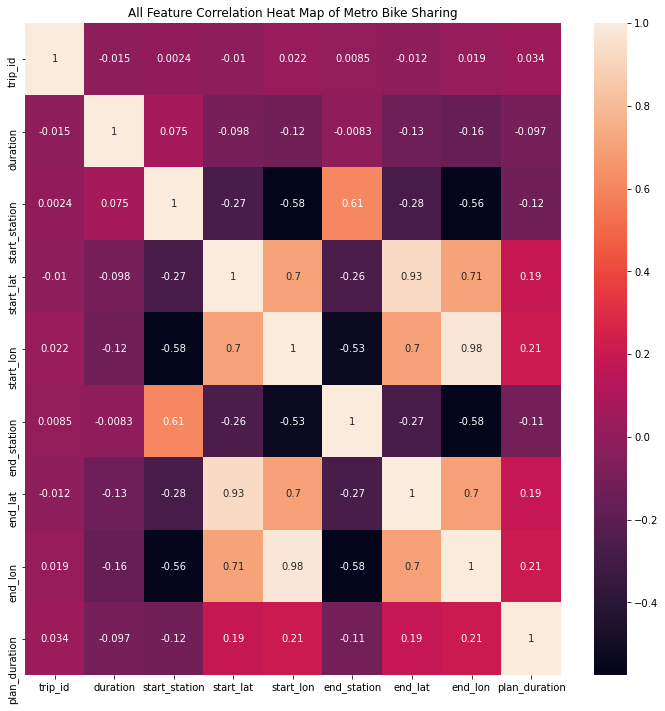

In [30]:
# correlation matrix for metro bike df
plt.figure(figsize = (12,12))
plt.title("All Feature Correlation Heat Map of Metro Bike Sharing")
plt.xlabel("Features")
plt.ylabel("Features")
sns.heatmap(df_metro_bike.corr(), annot=True)
plt.show()

In [11]:
# get a count of member type for analysis
count_memtype = (df_metro_bike.groupby(['passholder_type'])['trip_id'].count().sort_values(ascending=False)
                    .head(20).reset_index(name='count'))

# print number of members
count_memtype

passholder_type   count
0    Monthly Pass  103307
1         Walk-up   69684
2    One Day Pass   26728
3     Annual Pass   21276
4         Testing       1

In [9]:
# checking row count
df_metro_bike.shape

(220997, 17)

In [10]:
# removing Testing passholder_type since the data of this size does not impact analysis
df_metro_bike = df_metro_bike.loc[df_metro_bike['passholder_type'] != 'Testing']
df_metro_bike.shape

(220996, 17)

In [12]:
# get a count of member type for analysis after removing Tesing data
count_memtype = (df_metro_bike.groupby(['passholder_type'])['trip_id'].count().sort_values(ascending=False)
                    .head(20).reset_index(name='count'))

# print number of members
count_memtype

passholder_type   count
0    Monthly Pass  103307
1         Walk-up   69684
2    One Day Pass   26728
3     Annual Pass   21276

C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



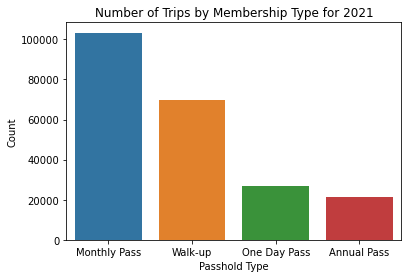

In [37]:
# plot the bar chart for trips by membership type

sns.barplot('passholder_type', 'count', data= count_memtype)
plt.title('Number of Trips by Membership Type for 2021', fontsize= 12)
plt.xlabel('Passhold Type', fontsize= 10)
plt.ylabel('Count', fontsize= 10)
plt.Figure(figsize=(12,12))
plt.show()

In [13]:
# bar chart to view trips my member type
 
fig = px.bar(count_memtype, x="passholder_type", y="count",
             title= 'Number of Trips by Membership Type for 2021' )

fig.show()

In [15]:
# create a date column
df_metro_bike['date'] = df_metro_bike['start_time'].dt.date

In [10]:
# check changes
countbydates = df_metro_bike.groupby(['date']).trip_id.count().reset_index(name='counts')
countbydates.head()

date  counts
0  2021-01-01     432
1  2021-01-02     430
2  2021-01-03     435
3  2021-01-04     305
4  2021-01-05     274

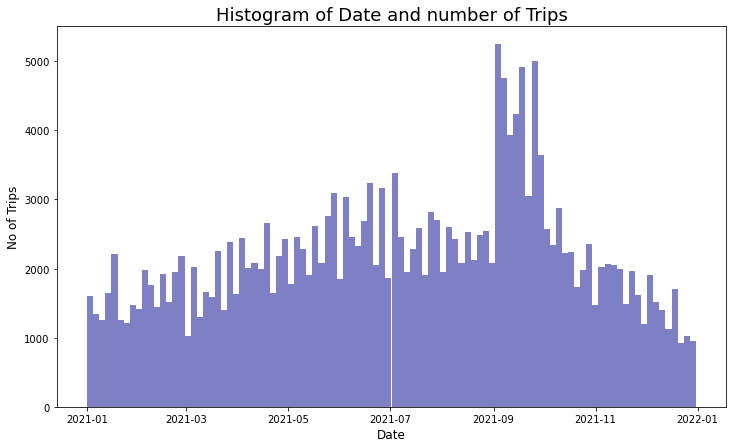

In [56]:
# histogram of frequency of trips by date
plt.rcParams['figure.figsize'] = (12, 7)
plt.hist(df_metro_bike['date'].dropna(), bins=100, facecolor='darkblue', alpha=0.5)
#Labels
plt.title('Histogram of Date and number of Trips', fontsize = 18)
plt.xlabel('Date', fontsize = 12)
plt.ylabel('No of Trips', fontsize = 12)

plt.show()

Text(0.5, 1.0, 'Trips for 2021 - Trend line')

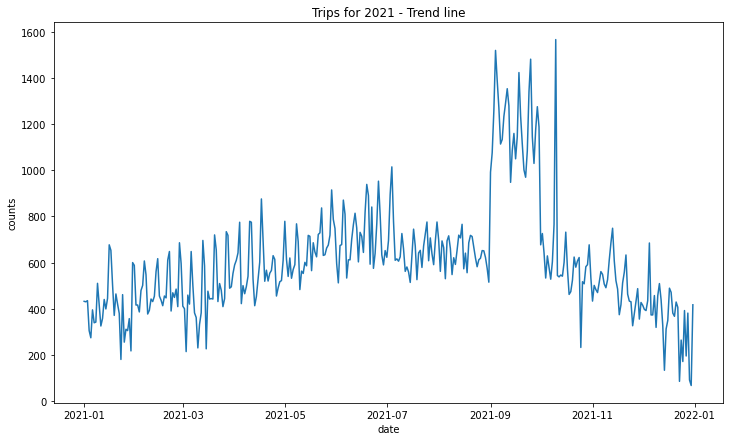

In [58]:
# trend line to review count of trips ny date
sns.lineplot(x="date", y="counts",
                data=countbydates)

plt.title("Trips for 2021 - Trend line")

In [12]:
# review what columns are available
df_metro_bike.columns

Index(['trip_id', 'duration', 'start_time', 'end_time', 'start_station',
       'start_lat', 'start_lon', 'end_station', 'end_lat', 'end_lon',
       'bike_id', 'plan_duration', 'trip_route_category', 'passholder_type',
       'bike_type', 'start station name', 'end station name', 'date'],
      dtype='object')

In [16]:
# check point copy before dropping elements
df_metro_bike_copy = df_metro_bike.copy(deep=True)

In [ ]:
# check metro bike copy - run when needed
#df_metro_bike_copy.head

In [17]:
# drop missing data from metro_bike
df_metro_bike=df_metro_bike.drop(['start station name','end station name'], axis=1)

In [18]:
# check changes
df_metro_bike.columns

Index(['trip_id', 'duration', 'start_time', 'end_time', 'start_station',
       'start_lat', 'start_lon', 'end_station', 'end_lat', 'end_lon',
       'bike_id', 'plan_duration', 'trip_route_category', 'passholder_type',
       'bike_type', 'date'],
      dtype='object')

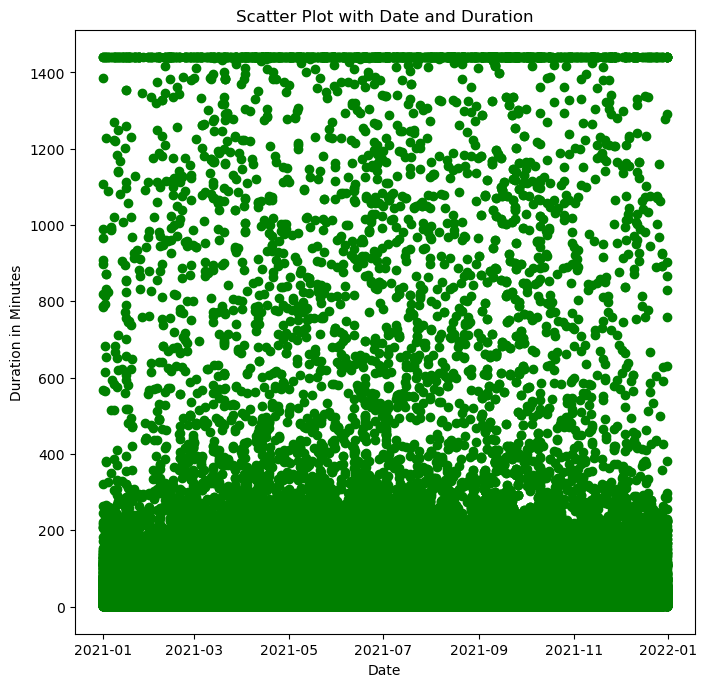

In [81]:
# scatterplot - To check data
x = df_metro_bike['date']
y = df_metro_bike['duration']

# plot
plt.scatter(x,y,color='green')
plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':100})

# labels
plt.title('Scatter Plot with Date and Duration')
plt.xlabel('Date')
plt.ylabel('Duration in Minutes')

plt.show()

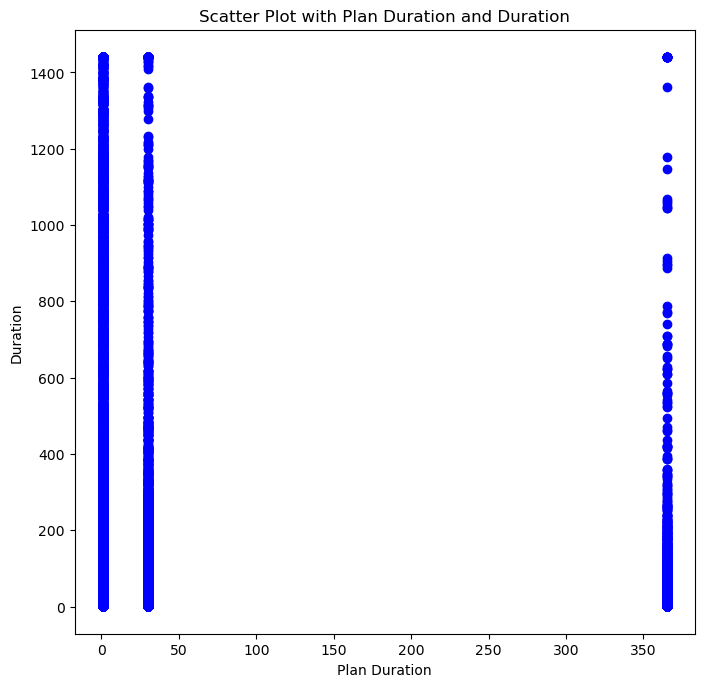

In [85]:
# scatterplot - To check data
x = df_metro_bike['plan_duration']
y = df_metro_bike['duration']

# plot
plt.scatter(x,y,color='blue')
plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':100})

# labels
plt.title('Scatter Plot with Plan Duration and Duration')
plt.xlabel('Plan Duration')
plt.ylabel('Duration')

plt.show()

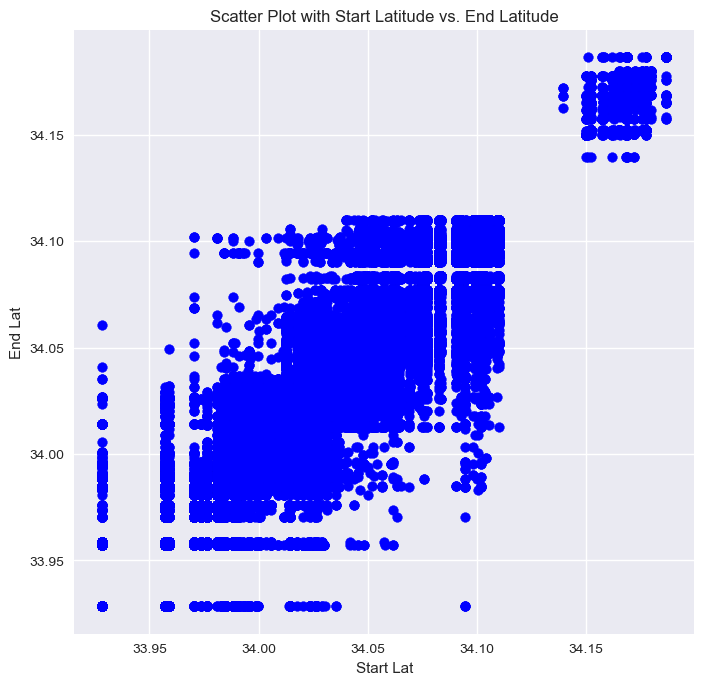

In [103]:
# scatterplot - To check data
x = df_metro_bike['start_lat']
y = df_metro_bike['end_lat']

# plot
plt.scatter(x,y,color='blue')
plt.rcParams.update({'figure.figsize':(8,8),'figure.dpi':100})
# labels
plt.title('Scatter Plot with Start Latitude vs. End Latitude')
plt.xlabel('Start Lat')
plt.ylabel('End Lat')

plt.show()

C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



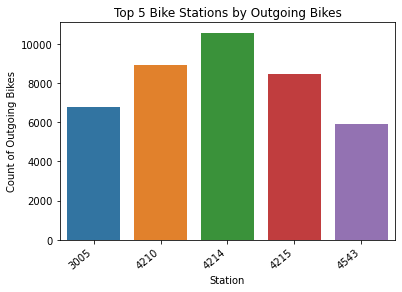

In [22]:
## top 5 stations by number of bikes
top5 = pd.DataFrame()
top5['Station'] = df_metro_bike['start_station'].value_counts().head().index
top5['Count of Outgoing Bikes']=df_metro_bike['start_station'].value_counts().head().values
top5['Station'] = top5['Station'].astype('category')

# plot the chart
sns.barplot('Station', 'Count of Outgoing Bikes', data = top5)
plt.xticks(rotation=40, ha = 'right')
plt.title("Top 5 Bike Stations by Outgoing Bikes")
plt.Figure(figsize=(10,10))
plt.show()

#### Autoviz to what is available

In [86]:
# Load data into a dataframe from combined file
new_file = 'metro_2021/metro_bike_2021.csv'

In [87]:
# importing Autoviz class
from autoviz.AutoViz_Class import AutoViz_Class#Instantiate the AutoViz class
AV = AutoViz_Class()

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


Shape of your Data Set: (220997, 17)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  5
    Number of String-Categorical Columns =  2
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  5
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    17 Predictors classified...
        This does not include the Target column(s)
        5 variables removed since they were ID or low-information variables
Since Number of Rows in data 220997 exceeds maximum, randomly sampling 150000 rows for EDA...
Number of All Scatter Plots = 10


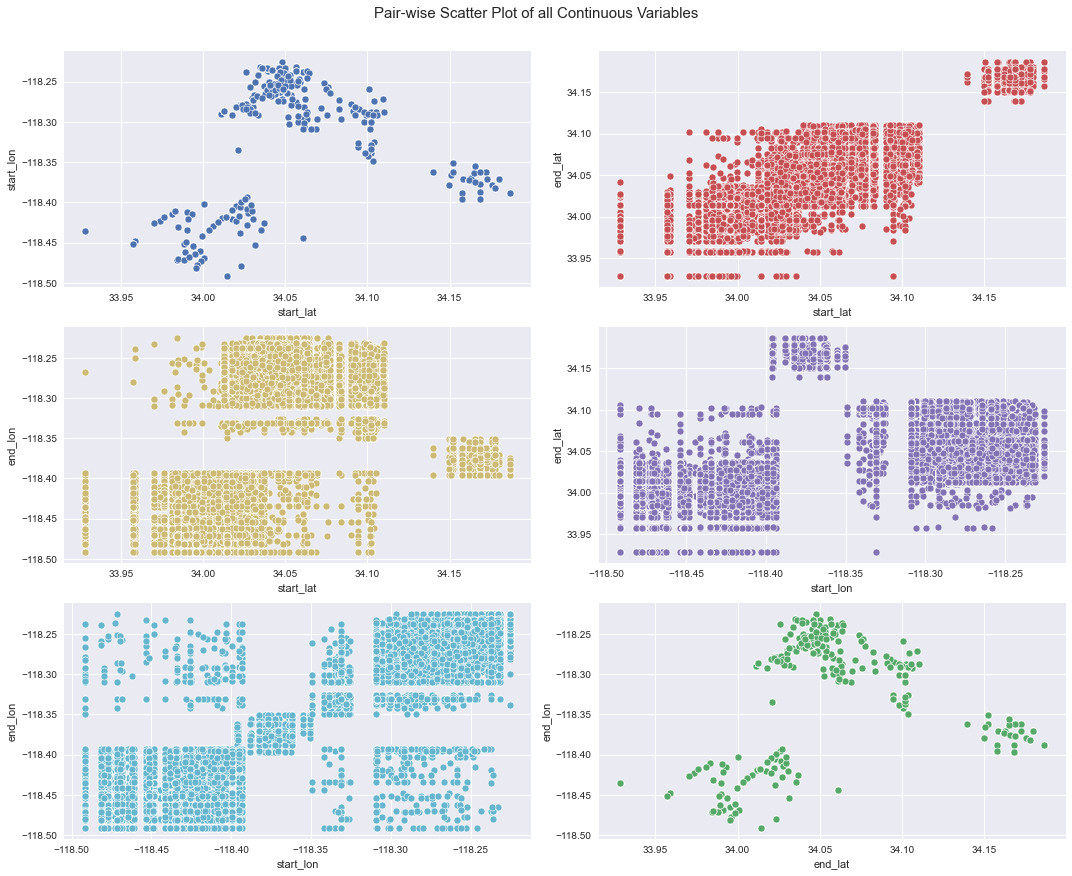

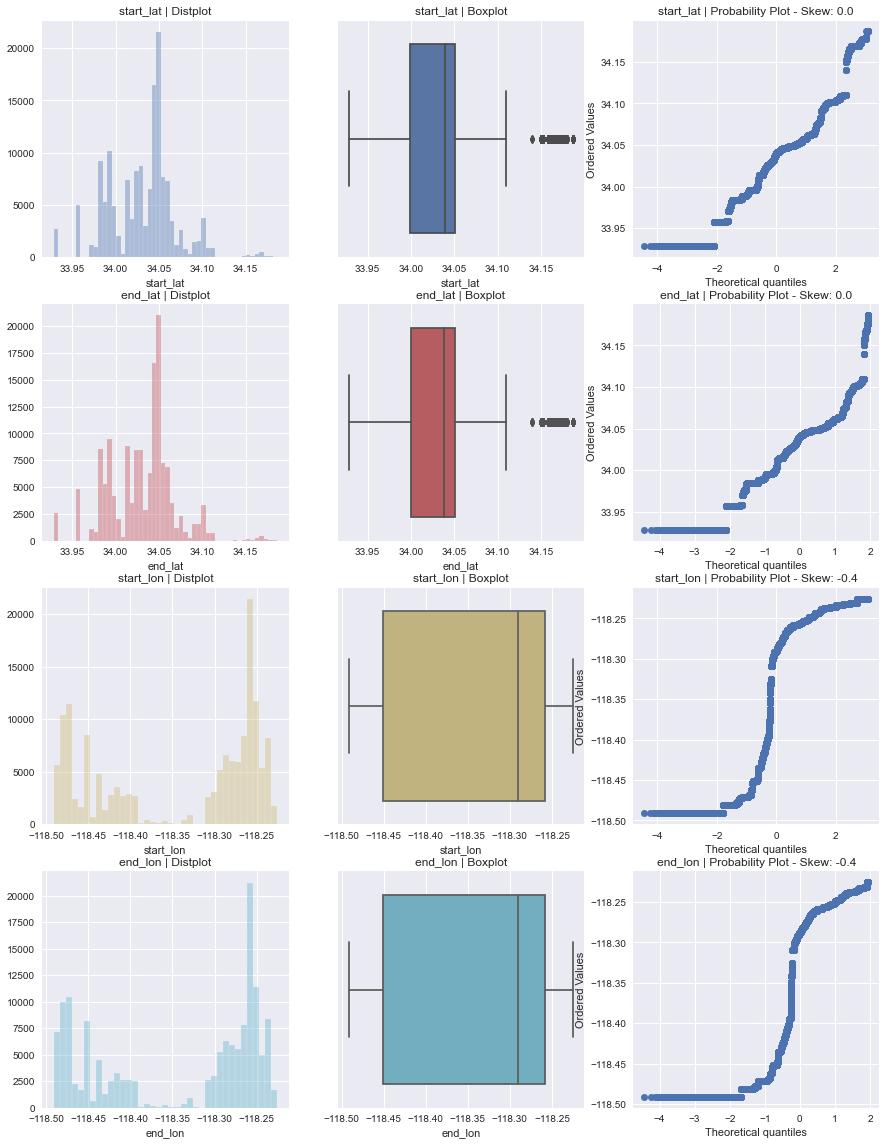

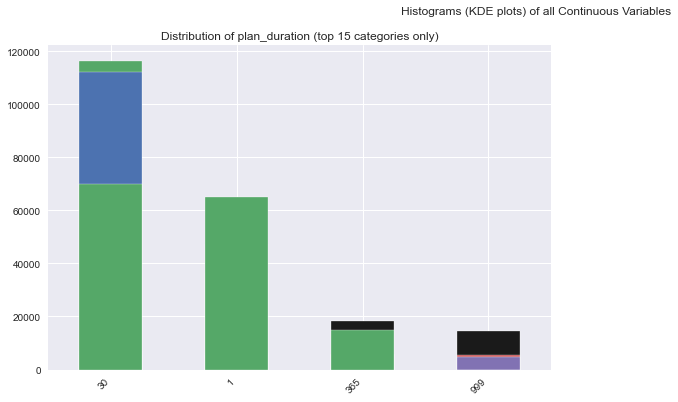

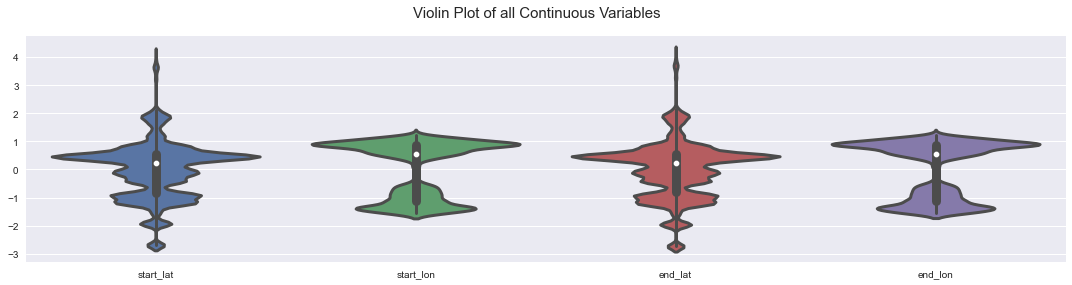

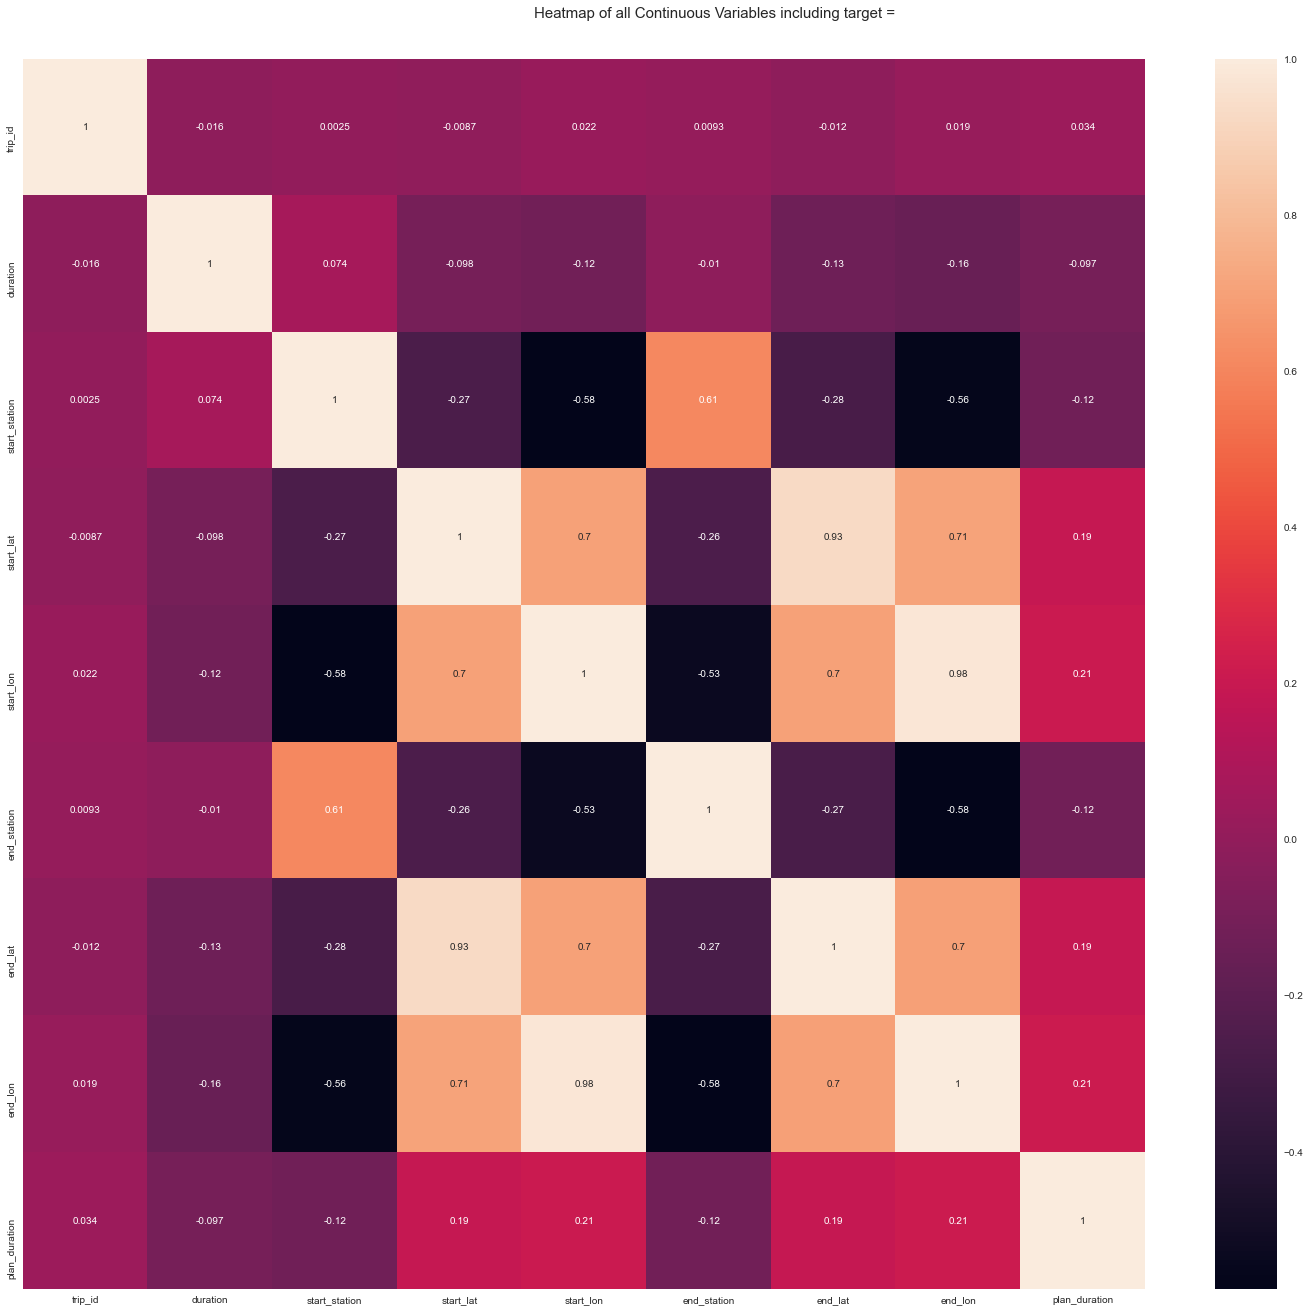

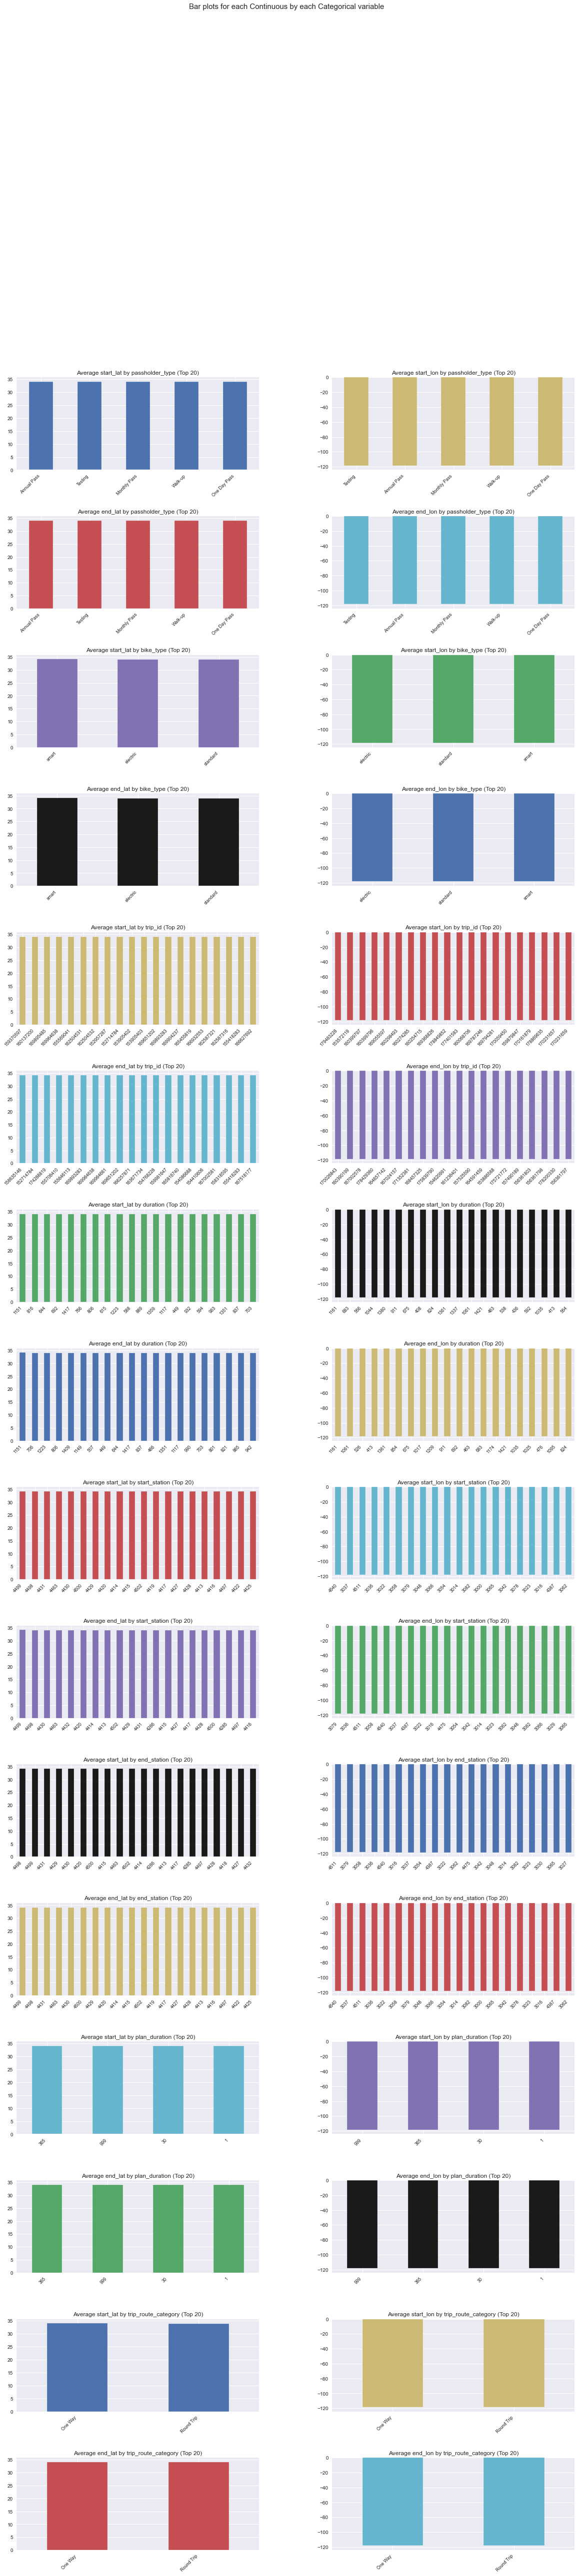

Time to run AutoViz (in seconds) = 40.584

 ###################### VISUALIZATION Completed ########################


In [88]:
# run AutoViz
df = AV.AutoViz(new_file)

#### Predicting Outgoing Bike Counts 

In [14]:
# check point for file
df_metro_bike_copy = df_metro_bike.copy(deep=True)

In [19]:
df_stations.columns

Index(['Station_ID', 'Station_Name', 'Go_live_date', 'Region', 'Status'], dtype='object')

In [20]:
df_metro_bike.columns

Index(['trip_id', 'duration', 'start_time', 'end_time', 'start_station',
       'start_lat', 'start_lon', 'end_station', 'end_lat', 'end_lon',
       'bike_id', 'plan_duration', 'trip_route_category', 'passholder_type',
       'bike_type', 'date'],
      dtype='object')

In [21]:
# combining station date with metro bike data
df_combined = pd.merge(df_stations,df_metro_bike, left_on = 'Station_ID', right_on='start_station', how = 'outer' )

# check combined df looks like 
df_combined.head()

Station_ID     Station_Name Go_live_date Region  Status      trip_id  \
0      3000.0  Virtual Station     7/7/2016    NaN  Active  151901291.0   
1      3000.0  Virtual Station     7/7/2016    NaN  Active  151940174.0   
2      3000.0  Virtual Station     7/7/2016    NaN  Active  152001683.0   
3      3000.0  Virtual Station     7/7/2016    NaN  Active  152157695.0   
4      3000.0  Virtual Station     7/7/2016    NaN  Active  152265285.0   

   duration          start_time            end_time  start_station  start_lat  \
0       1.0 2021-01-05 20:53:00 2021-01-05 20:54:00         3000.0        NaN   
1      98.0 2021-01-06 17:07:00 2021-01-06 18:45:00         3000.0        NaN   
2       1.0 2021-01-08 14:11:00 2021-01-08 14:12:00         3000.0        NaN   
3       2.0 2021-01-12 15:07:00 2021-01-12 15:09:00         3000.0        NaN   
4      18.0 2021-01-15 08:26:00 2021-01-15 08:44:00         3000.0        NaN   

   start_lon  end_station  end_lat     end_lon bike_id  plan_duration  \
0        NaN       4500.0  34.1721 -118.361816   15179           30.0   
1        NaN       4500.0  34.1721 -118.361816   15883           30.0   
2        NaN       4285.0      NaN         NaN   15235          365.0   
3        NaN       4285.0      NaN         NaN   16251          365.0   
4        NaN       4285.0      NaN         NaN   15295           30.0   

  trip_route_category passholder_type bike_type        date  
0             One Way    Monthly Pass     smart  2021-01-05  
1             One Way    Monthly Pass     smart  2021-01-06  
2             One Way     Annual Pass     smart  2021-01-08  
3             One Way     Annual Pass     smart  2021-01-12  
4             One Way    Monthly Pass     smart  2021-01-15

In [22]:
# check for nulls in the station file that got combined
len(df_combined[df_combined.Station_ID.isnull()])

791

In [23]:
# check for nulls in metro bike station id column
len(df_combined[df_combined.start_station.isnull()])

128

In [24]:
# view the unmatched data
df_combined[df_combined.start_station.isnull()].head()

Station_ID      Station_Name Go_live_date      Region    Status  \
13500      3013.0  Anaheim & Avalon    7/12/2016  Port of LA  Inactive   
19772      3021.0        3rd & Rose     7/7/2016        DTLA  Inactive   
40002      3038.0        Main & 5th     7/7/2016        DTLA  Inactive   
46926      3051.0    7th & Broadway     7/7/2016        DTLA  Inactive   
49173      3055.0        7th & Main     7/7/2016        DTLA  Inactive   

       trip_id  duration start_time end_time  start_station  start_lat  \
13500      NaN       NaN        NaT      NaT            NaN        NaN   
19772      NaN       NaN        NaT      NaT            NaN        NaN   
40002      NaN       NaN        NaT      NaT            NaN        NaN   
46926      NaN       NaN        NaT      NaT            NaN        NaN   
49173      NaN       NaN        NaT      NaT            NaN        NaN   

       start_lon  end_station  end_lat  end_lon bike_id  plan_duration  \
13500        NaN          NaN      NaN      NaN     NaN            NaN   
19772        NaN          NaN      NaN      NaN     NaN            NaN   
40002        NaN          NaN      NaN      NaN     NaN            NaN   
46926        NaN          NaN      NaN      NaN     NaN            NaN   
49173        NaN          NaN      NaN      NaN     NaN            NaN   

      trip_route_category passholder_type bike_type date  
13500                 NaN             NaN       NaN  NaN  
19772                 NaN             NaN       NaN  NaN  
40002                 NaN             NaN       NaN  NaN  
46926                 NaN             NaN       NaN  NaN  
49173                 NaN             NaN       NaN  NaN

In [25]:
# check the shape before
df_combined.shape

(221124, 21)

In [28]:
# check point for file for the new combined file
df_combined_copy = df_combined.copy(deep=True)

In [29]:
# drop the unmatched data
df_combined = df_combined.dropna(axis=0, subset=['start_station'])

In [30]:
# check the shape before
df_combined.shape

(220996, 21)

##### Note:
128 records dropped

In [31]:
# confirm obersation unmatched data
df_combined[df_combined.start_station.isnull()].head()

Empty DataFrame
Columns: [Station_ID, Station_Name, Go_live_date, Region, Status, trip_id, duration, start_time, end_time, start_station, start_lat, start_lon, end_station, end_lat, end_lon, bike_id, plan_duration, trip_route_category, passholder_type, bike_type, date]
Index: []

In [32]:
# additional file for dates
df_date = pd.read_csv('metro_2021/calendar.csv')
# check the file should have only 2021 dates
df_date.head()

sasdate  date_key word_date      date    year  quarter  month  \
0  22281.0   10121.0  1-Jan-21  1/1/2021  2021.0      1.0    1.0   
1  22282.0   10221.0  2-Jan-21  1/2/2021  2021.0      1.0    1.0   
2  22283.0   10321.0  3-Jan-21  1/3/2021  2021.0      1.0    1.0   
3  22284.0   10421.0  4-Jan-21  1/4/2021  2021.0      1.0    1.0   
4  22285.0   10521.0  5-Jan-21  1/5/2021  2021.0      1.0    1.0   

   day_of_month  week day_of_week  weekday month_and_year  holiday  
0           1.0   0.0         Fri      6.0         Jan-21  NEWYEAR  
1           2.0   0.0         Sat      7.0         Jan-21      NaN  
2           3.0   1.0         Sun      1.0         Jan-21      NaN  
3           4.0   1.0         Mon      2.0         Jan-21      NaN  
4           5.0   1.0         Tue      3.0         Jan-21      NaN

Note: The concept of bring in a file that contains days of week and which days are week days compared to weekends to get a better idea of correlation

In [33]:
# update the date field
df_date['date1'] = pd.to_datetime(df_date['date'], format='%m/%d/%Y')

In [34]:
# check out data
df_date.head()

sasdate  date_key word_date      date    year  quarter  month  \
0  22281.0   10121.0  1-Jan-21  1/1/2021  2021.0      1.0    1.0   
1  22282.0   10221.0  2-Jan-21  1/2/2021  2021.0      1.0    1.0   
2  22283.0   10321.0  3-Jan-21  1/3/2021  2021.0      1.0    1.0   
3  22284.0   10421.0  4-Jan-21  1/4/2021  2021.0      1.0    1.0   
4  22285.0   10521.0  5-Jan-21  1/5/2021  2021.0      1.0    1.0   

   day_of_month  week day_of_week  weekday month_and_year  holiday      date1  
0           1.0   0.0         Fri      6.0         Jan-21  NEWYEAR 2021-01-01  
1           2.0   0.0         Sat      7.0         Jan-21      NaN 2021-01-02  
2           3.0   1.0         Sun      1.0         Jan-21      NaN 2021-01-03  
3           4.0   1.0         Mon      2.0         Jan-21      NaN 2021-01-04  
4           5.0   1.0         Tue      3.0         Jan-21      NaN 2021-01-05

In [20]:
df_combined.columns

Index(['Station_ID', 'Station_Name', 'Go_live_date', 'Region', 'Status',
       'trip_id', 'duration', 'start_time', 'end_time', 'start_station',
       'start_lat', 'start_lon', 'end_station', 'end_lat', 'end_lon',
       'bike_id', 'plan_duration', 'trip_route_category', 'passholder_type',
       'bike_type', 'start station name', 'end station name'],
      dtype='object')

In [35]:
# create outgoing bike date
df_combined['outgoingbike_dt'] = pd.to_datetime(df_combined['date'], format='%Y-%m-%d')
df_combined.head()

Station_ID     Station_Name Go_live_date Region  Status      trip_id  \
0      3000.0  Virtual Station     7/7/2016    NaN  Active  151901291.0   
1      3000.0  Virtual Station     7/7/2016    NaN  Active  151940174.0   
2      3000.0  Virtual Station     7/7/2016    NaN  Active  152001683.0   
3      3000.0  Virtual Station     7/7/2016    NaN  Active  152157695.0   
4      3000.0  Virtual Station     7/7/2016    NaN  Active  152265285.0   

   duration          start_time            end_time  start_station  start_lat  \
0       1.0 2021-01-05 20:53:00 2021-01-05 20:54:00         3000.0        NaN   
1      98.0 2021-01-06 17:07:00 2021-01-06 18:45:00         3000.0        NaN   
2       1.0 2021-01-08 14:11:00 2021-01-08 14:12:00         3000.0        NaN   
3       2.0 2021-01-12 15:07:00 2021-01-12 15:09:00         3000.0        NaN   
4      18.0 2021-01-15 08:26:00 2021-01-15 08:44:00         3000.0        NaN   

   start_lon  end_station  end_lat     end_lon bike_id  plan_duration  \
0        NaN       4500.0  34.1721 -118.361816   15179           30.0   
1        NaN       4500.0  34.1721 -118.361816   15883           30.0   
2        NaN       4285.0      NaN         NaN   15235          365.0   
3        NaN       4285.0      NaN         NaN   16251          365.0   
4        NaN       4285.0      NaN         NaN   15295           30.0   

  trip_route_category passholder_type bike_type        date outgoingbike_dt  
0             One Way    Monthly Pass     smart  2021-01-05      2021-01-05  
1             One Way    Monthly Pass     smart  2021-01-06      2021-01-06  
2             One Way     Annual Pass     smart  2021-01-08      2021-01-08  
3             One Way     Annual Pass     smart  2021-01-12      2021-01-12  
4             One Way    Monthly Pass     smart  2021-01-15      2021-01-15

In [36]:
# merge the dates into df_combined
df_mb_la = pd.merge(df_combined,df_date, left_on = ['outgoingbike_dt'], right_on = ['date1'] , how = 'outer')

In [37]:
# check the data
df_mb_la.head()

Station_ID     Station_Name Go_live_date Region  Status      trip_id  \
0      3000.0  Virtual Station     7/7/2016    NaN  Active  151901291.0   
1      3005.0     7th & Flower     7/7/2016   DTLA  Active  151875290.0   
2      3005.0     7th & Flower     7/7/2016   DTLA  Active  151876311.0   
3      3005.0     7th & Flower     7/7/2016   DTLA  Active  151882598.0   
4      3005.0     7th & Flower     7/7/2016   DTLA  Active  151885191.0   

   duration          start_time            end_time  start_station  start_lat  \
0       1.0 2021-01-05 20:53:00 2021-01-05 20:54:00         3000.0        NaN   
1      29.0 2021-01-05 07:10:00 2021-01-05 07:39:00         3005.0    34.0485   
2      22.0 2021-01-05 08:01:00 2021-01-05 08:23:00         3005.0    34.0485   
3      22.0 2021-01-05 12:39:00 2021-01-05 13:01:00         3005.0    34.0485   
4       3.0 2021-01-05 15:07:00 2021-01-05 15:10:00         3005.0    34.0485   

    start_lon  end_station   end_lat     end_lon bike_id  plan_duration  \
0         NaN       4500.0  34.17210 -118.361816   15179           30.0   
1 -118.258537       4275.0  34.01252 -118.285896   20173           30.0   
2 -118.258537       4387.0  34.03352 -118.241837   12382           30.0   
3 -118.258537       3075.0  34.04211 -118.256187    6631           30.0   
4 -118.258537       3006.0  34.04554 -118.256668   18957          365.0   

  trip_route_category passholder_type bike_type      date_x outgoingbike_dt  \
0             One Way    Monthly Pass     smart  2021-01-05      2021-01-05   
1             One Way    Monthly Pass  standard  2021-01-05      2021-01-05   
2             One Way    Monthly Pass  standard  2021-01-05      2021-01-05   
3             One Way    Monthly Pass  standard  2021-01-05      2021-01-05   
4             One Way     Annual Pass  electric  2021-01-05      2021-01-05   

   sasdate  date_key word_date    date_y    year  quarter  month  \
0  22285.0   10521.0  5-Jan-21  1/5/2021  2021.0      1.0    1.0   
1  22285.0   10521.0  5-Jan-21  1/5/2021  2021.0      1.0    1.0   
2  22285.0   10521.0  5-Jan-21  1/5/2021  2021.0      1.0    1.0   
3  22285.0   10521.0  5-Jan-21  1/5/2021  2021.0      1.0    1.0   
4  22285.0   10521.0  5-Jan-21  1/5/2021  2021.0      1.0    1.0   

   day_of_month  week day_of_week  weekday month_and_year holiday      date1  
0           5.0   1.0         Tue      3.0         Jan-21     NaN 2021-01-05  
1           5.0   1.0         Tue      3.0         Jan-21     NaN 2021-01-05  
2           5.0   1.0         Tue      3.0         Jan-21     NaN 2021-01-05  
3           5.0   1.0         Tue      3.0         Jan-21     NaN 2021-01-05  
4           5.0   1.0         Tue      3.0         Jan-21     NaN 2021-01-05

In [38]:
# check the size
df_mb_la.shape

(222351, 36)

In [39]:
# review the columns
df_mb_la.columns

Index(['Station_ID', 'Station_Name', 'Go_live_date', 'Region', 'Status',
       'trip_id', 'duration', 'start_time', 'end_time', 'start_station',
       'start_lat', 'start_lon', 'end_station', 'end_lat', 'end_lon',
       'bike_id', 'plan_duration', 'trip_route_category', 'passholder_type',
       'bike_type', 'date_x', 'outgoingbike_dt', 'sasdate', 'date_key',
       'word_date', 'date_y', 'year', 'quarter', 'month', 'day_of_month',
       'week', 'day_of_week', 'weekday', 'month_and_year', 'holiday', 'date1'],
      dtype='object')

In [40]:
# check point for file
df_mb_la_copy = df_mb_la.copy(deep=True)

In [41]:
df_mb_la_copy.head()

Station_ID     Station_Name Go_live_date Region  Status      trip_id  \
0      3000.0  Virtual Station     7/7/2016    NaN  Active  151901291.0   
1      3005.0     7th & Flower     7/7/2016   DTLA  Active  151875290.0   
2      3005.0     7th & Flower     7/7/2016   DTLA  Active  151876311.0   
3      3005.0     7th & Flower     7/7/2016   DTLA  Active  151882598.0   
4      3005.0     7th & Flower     7/7/2016   DTLA  Active  151885191.0   

   duration          start_time            end_time  start_station  start_lat  \
0       1.0 2021-01-05 20:53:00 2021-01-05 20:54:00         3000.0        NaN   
1      29.0 2021-01-05 07:10:00 2021-01-05 07:39:00         3005.0    34.0485   
2      22.0 2021-01-05 08:01:00 2021-01-05 08:23:00         3005.0    34.0485   
3      22.0 2021-01-05 12:39:00 2021-01-05 13:01:00         3005.0    34.0485   
4       3.0 2021-01-05 15:07:00 2021-01-05 15:10:00         3005.0    34.0485   

    start_lon  end_station   end_lat     end_lon bike_id  plan_duration  \
0         NaN       4500.0  34.17210 -118.361816   15179           30.0   
1 -118.258537       4275.0  34.01252 -118.285896   20173           30.0   
2 -118.258537       4387.0  34.03352 -118.241837   12382           30.0   
3 -118.258537       3075.0  34.04211 -118.256187    6631           30.0   
4 -118.258537       3006.0  34.04554 -118.256668   18957          365.0   

  trip_route_category passholder_type bike_type      date_x outgoingbike_dt  \
0             One Way    Monthly Pass     smart  2021-01-05      2021-01-05   
1             One Way    Monthly Pass  standard  2021-01-05      2021-01-05   
2             One Way    Monthly Pass  standard  2021-01-05      2021-01-05   
3             One Way    Monthly Pass  standard  2021-01-05      2021-01-05   
4             One Way     Annual Pass  electric  2021-01-05      2021-01-05   

   sasdate  date_key word_date    date_y    year  quarter  month  \
0  22285.0   10521.0  5-Jan-21  1/5/2021  2021.0      1.0    1.0   
1  22285.0   10521.0  5-Jan-21  1/5/2021  2021.0      1.0    1.0   
2  22285.0   10521.0  5-Jan-21  1/5/2021  2021.0      1.0    1.0   
3  22285.0   10521.0  5-Jan-21  1/5/2021  2021.0      1.0    1.0   
4  22285.0   10521.0  5-Jan-21  1/5/2021  2021.0      1.0    1.0   

   day_of_month  week day_of_week  weekday month_and_year holiday      date1  
0           5.0   1.0         Tue      3.0         Jan-21     NaN 2021-01-05  
1           5.0   1.0         Tue      3.0         Jan-21     NaN 2021-01-05  
2           5.0   1.0         Tue      3.0         Jan-21     NaN 2021-01-05  
3           5.0   1.0         Tue      3.0         Jan-21     NaN 2021-01-05  
4           5.0   1.0         Tue      3.0         Jan-21     NaN 2021-01-05

In [42]:
# clean up of the df remove unneed columns and nulls
df_mb_la = df_mb_la.drop(['date_x', 'sasdate','date_key','word_date','date_y',\
                          'month_and_year','date1','outgoingbike_dt'                         
                         ] , axis = 1 )

# check the df
df_mb_la.head()

Station_ID     Station_Name Go_live_date Region  Status      trip_id  \
0      3000.0  Virtual Station     7/7/2016    NaN  Active  151901291.0   
1      3005.0     7th & Flower     7/7/2016   DTLA  Active  151875290.0   
2      3005.0     7th & Flower     7/7/2016   DTLA  Active  151876311.0   
3      3005.0     7th & Flower     7/7/2016   DTLA  Active  151882598.0   
4      3005.0     7th & Flower     7/7/2016   DTLA  Active  151885191.0   

   duration          start_time            end_time  start_station  start_lat  \
0       1.0 2021-01-05 20:53:00 2021-01-05 20:54:00         3000.0        NaN   
1      29.0 2021-01-05 07:10:00 2021-01-05 07:39:00         3005.0    34.0485   
2      22.0 2021-01-05 08:01:00 2021-01-05 08:23:00         3005.0    34.0485   
3      22.0 2021-01-05 12:39:00 2021-01-05 13:01:00         3005.0    34.0485   
4       3.0 2021-01-05 15:07:00 2021-01-05 15:10:00         3005.0    34.0485   

    start_lon  end_station   end_lat     end_lon bike_id  plan_duration  \
0         NaN       4500.0  34.17210 -118.361816   15179           30.0   
1 -118.258537       4275.0  34.01252 -118.285896   20173           30.0   
2 -118.258537       4387.0  34.03352 -118.241837   12382           30.0   
3 -118.258537       3075.0  34.04211 -118.256187    6631           30.0   
4 -118.258537       3006.0  34.04554 -118.256668   18957          365.0   

  trip_route_category passholder_type bike_type    year  quarter  month  \
0             One Way    Monthly Pass     smart  2021.0      1.0    1.0   
1             One Way    Monthly Pass  standard  2021.0      1.0    1.0   
2             One Way    Monthly Pass  standard  2021.0      1.0    1.0   
3             One Way    Monthly Pass  standard  2021.0      1.0    1.0   
4             One Way     Annual Pass  electric  2021.0      1.0    1.0   

   day_of_month  week day_of_week  weekday holiday  
0           5.0   1.0         Tue      3.0     NaN  
1           5.0   1.0         Tue      3.0     NaN  
2           5.0   1.0         Tue      3.0     NaN  
3           5.0   1.0         Tue      3.0     NaN  
4           5.0   1.0         Tue      3.0     NaN

In [43]:
# update holiday column from NaN to '0'
df_mb_la[['holiday']]=df_mb_la[['holiday']].where(df_mb_la[['holiday']].isnull(), 1).fillna(0).astype(int)

# check the df
df_mb_la.head()

Station_ID     Station_Name Go_live_date Region  Status      trip_id  \
0      3000.0  Virtual Station     7/7/2016    NaN  Active  151901291.0   
1      3005.0     7th & Flower     7/7/2016   DTLA  Active  151875290.0   
2      3005.0     7th & Flower     7/7/2016   DTLA  Active  151876311.0   
3      3005.0     7th & Flower     7/7/2016   DTLA  Active  151882598.0   
4      3005.0     7th & Flower     7/7/2016   DTLA  Active  151885191.0   

   duration          start_time            end_time  start_station  start_lat  \
0       1.0 2021-01-05 20:53:00 2021-01-05 20:54:00         3000.0        NaN   
1      29.0 2021-01-05 07:10:00 2021-01-05 07:39:00         3005.0    34.0485   
2      22.0 2021-01-05 08:01:00 2021-01-05 08:23:00         3005.0    34.0485   
3      22.0 2021-01-05 12:39:00 2021-01-05 13:01:00         3005.0    34.0485   
4       3.0 2021-01-05 15:07:00 2021-01-05 15:10:00         3005.0    34.0485   

    start_lon  end_station   end_lat     end_lon bike_id  plan_duration  \
0         NaN       4500.0  34.17210 -118.361816   15179           30.0   
1 -118.258537       4275.0  34.01252 -118.285896   20173           30.0   
2 -118.258537       4387.0  34.03352 -118.241837   12382           30.0   
3 -118.258537       3075.0  34.04211 -118.256187    6631           30.0   
4 -118.258537       3006.0  34.04554 -118.256668   18957          365.0   

  trip_route_category passholder_type bike_type    year  quarter  month  \
0             One Way    Monthly Pass     smart  2021.0      1.0    1.0   
1             One Way    Monthly Pass  standard  2021.0      1.0    1.0   
2             One Way    Monthly Pass  standard  2021.0      1.0    1.0   
3             One Way    Monthly Pass  standard  2021.0      1.0    1.0   
4             One Way     Annual Pass  electric  2021.0      1.0    1.0   

   day_of_month  week day_of_week  weekday  holiday  
0           5.0   1.0         Tue      3.0        0  
1           5.0   1.0         Tue      3.0        0  
2           5.0   1.0         Tue      3.0        0  
3           5.0   1.0         Tue      3.0        0  
4           5.0   1.0         Tue      3.0        0

In [44]:
df_mb_la.columns

Index(['Station_ID', 'Station_Name', 'Go_live_date', 'Region', 'Status',
       'trip_id', 'duration', 'start_time', 'end_time', 'start_station',
       'start_lat', 'start_lon', 'end_station', 'end_lat', 'end_lon',
       'bike_id', 'plan_duration', 'trip_route_category', 'passholder_type',
       'bike_type', 'year', 'quarter', 'month', 'day_of_month', 'week',
       'day_of_week', 'weekday', 'holiday'],
      dtype='object')

In [45]:
# drop additional columns as they are not needed
df_mb_la_cor = df_mb_la.drop(['start_station','start_lat', 'start_lon', 'end_station', 'end_lat', 'end_lon',\
                          'bike_id', 'plan_duration'] , axis = 1 )

In [46]:
df_mb_la.columns

Index(['Station_ID', 'Station_Name', 'Go_live_date', 'Region', 'Status',
       'trip_id', 'duration', 'start_time', 'end_time', 'start_station',
       'start_lat', 'start_lon', 'end_station', 'end_lat', 'end_lon',
       'bike_id', 'plan_duration', 'trip_route_category', 'passholder_type',
       'bike_type', 'year', 'quarter', 'month', 'day_of_month', 'week',
       'day_of_week', 'weekday', 'holiday'],
      dtype='object')

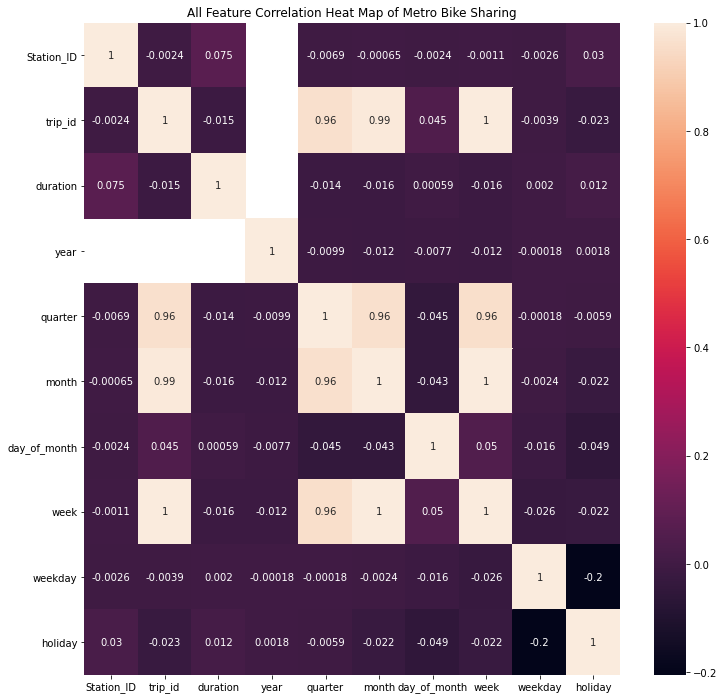

In [48]:
# correlation matrix for metro bike df
plt.figure(figsize = (12,12))
plt.title("All Feature Correlation Heat Map of Metro Bike Sharing")
plt.xlabel("Features")
plt.ylabel("Features")
sns.heatmap(df_mb_la_cor.corr(), annot=True)
plt.show()

In [47]:
# check point for file
df_mb_la_copy = df_mb_la.copy(deep=True)

C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


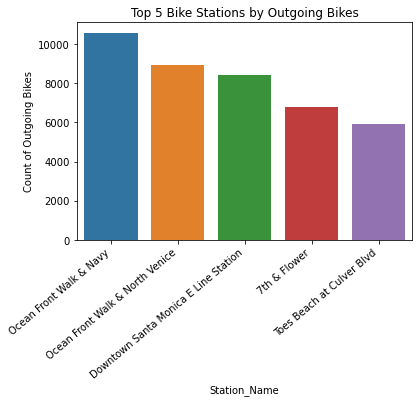

In [40]:
## top 5 stations by number of bikes
top5 = pd.DataFrame()
top5['Station_Name'] = df_mb_la['Station_Name'].value_counts().head().index
top5['Count of Outgoing Bikes']=df_mb_la['start_station'].value_counts().head().values
#top5['Station_Name'] = top5['Station_Name'].astype('category')

# plot the chart
sns.barplot('Station_Name', 'Count of Outgoing Bikes', data = top5)
plt.xticks(rotation=40, ha = 'right')
plt.title("Top 5 Bike Stations by Outgoing Bikes")
plt.Figure(figsize=(10,10))
plt.show()

In [52]:
# condition for new price column
price = [
        (df_mb_la['passholder_type'] == 'Monthly Pass'),
        (df_mb_la['passholder_type'] == 'Walk-up'),
        (df_mb_la['passholder_type'] == 'One Day Pass'),
        (df_mb_la['passholder_type'] == 'Annual Pass')
        ]

# create a list of the values we want to assign for each condition
values = [17.00,1.75 ,5.00 ,150.00 ]

In [53]:
# create a new column and use np.select to assign values to it using our lists as arguments
df_mb_la['price'] = np.select(price, values)

In [54]:
df_mb_la.head()

Station_ID     Station_Name Go_live_date Region  Status      trip_id  \
0      3000.0  Virtual Station     7/7/2016    NaN  Active  151901291.0   
1      3005.0     7th & Flower     7/7/2016   DTLA  Active  151875290.0   
2      3005.0     7th & Flower     7/7/2016   DTLA  Active  151876311.0   
3      3005.0     7th & Flower     7/7/2016   DTLA  Active  151882598.0   
4      3005.0     7th & Flower     7/7/2016   DTLA  Active  151885191.0   

   duration          start_time            end_time  start_station  start_lat  \
0       1.0 2021-01-05 20:53:00 2021-01-05 20:54:00         3000.0        NaN   
1      29.0 2021-01-05 07:10:00 2021-01-05 07:39:00         3005.0    34.0485   
2      22.0 2021-01-05 08:01:00 2021-01-05 08:23:00         3005.0    34.0485   
3      22.0 2021-01-05 12:39:00 2021-01-05 13:01:00         3005.0    34.0485   
4       3.0 2021-01-05 15:07:00 2021-01-05 15:10:00         3005.0    34.0485   

    start_lon  end_station   end_lat     end_lon bike_id  plan_duration  \
0         NaN       4500.0  34.17210 -118.361816   15179           30.0   
1 -118.258537       4275.0  34.01252 -118.285896   20173           30.0   
2 -118.258537       4387.0  34.03352 -118.241837   12382           30.0   
3 -118.258537       3075.0  34.04211 -118.256187    6631           30.0   
4 -118.258537       3006.0  34.04554 -118.256668   18957          365.0   

  trip_route_category passholder_type bike_type  year  quarter  month  \
0             One Way    Monthly Pass     smart  2021        1      1   
1             One Way    Monthly Pass  standard  2021        1      1   
2             One Way    Monthly Pass  standard  2021        1      1   
3             One Way    Monthly Pass  standard  2021        1      1   
4             One Way     Annual Pass  electric  2021        1      1   

   day_of_month  week day_of_week  weekday  holiday  price  
0             5     1         Tue        3        0   17.0  
1             5     1         Tue        3        0   17.0  
2             5     1         Tue        3        0   17.0  
3             5     1         Tue        3        0   17.0  
4             5     1         Tue        3        0  150.0

In [55]:
# get a sum of price for analysis after removing
price_memtype = (df_mb_la.groupby(['passholder_type'])['price'].sum().sort_values(ascending=False)
                    .head(20).reset_index(name='sum_price'))

# print number of members
price_memtype

passholder_type  sum_price
0     Annual Pass  3191400.0
1    Monthly Pass  1756219.0
2    One Day Pass   133640.0
3         Walk-up   121947.0

In [56]:
# bar chart of passholders compared to revenue
 
fig = px.bar(price_memtype, x='passholder_type', y='sum_price',
             title= 'Revenve by Passholder Type for 2021' )

fig.show()

In [62]:
# get a sum of price for analysis after removing
month_memtype = (df_mb_la.groupby(['month'])['passholder_type'].count().sort_values(ascending=False)
                    .head(20).reset_index(name='passholder_type'))

# print number of members
month_memtype

month  passholder_type
0       9            35774
1       6            21321
2       7            20697
3       5            20506
4       8            19826
5      10            18863
6       4            17254
7      11            14920
8       3            14692
9       2            13577
10      1            12589
11     12            10976

C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



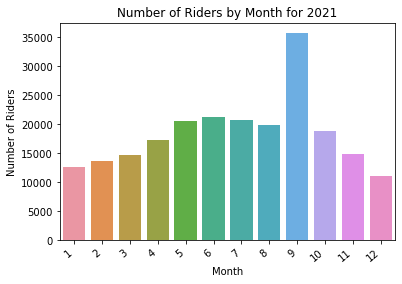

In [67]:
sns.barplot('month', 'passholder_type', data= month_memtype)
plt.xticks(rotation=40, ha = 'right')
plt.Figure(figsize=(12,12))
plt.title('Number of Riders by Month for 2021', fontsize= 12)
plt.xlabel('Month', fontsize= 10)
plt.ylabel('Number of Riders', fontsize= 10)

plt.show()

In [70]:
# get a count of trips by day of week 
day_usage = (df_mb_la.groupby(['day_of_week'])['trip_id'].count().sort_values(ascending=False)
                    .head(20).reset_index(name='count'))

# print usage
day_usage

day_of_week  count
0         Sat  37900
1         Sun  36887
2         Fri  32184
3         Thu  29179
4         Tue  28896
5         Wed  28702
6         Mon  27248

C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



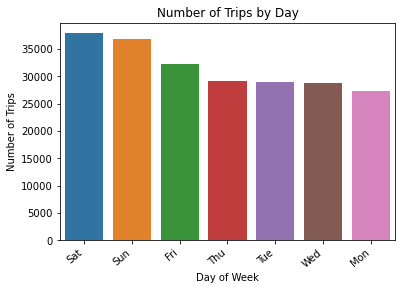

In [74]:
#Bar plot
sns.barplot('day_of_week', 'count', data= day_usage)
plt.xticks(rotation=40, ha = 'right')
plt.Figure(figsize=(12,12))
plt.title('Number of Trips by Day', fontsize= 12)
plt.xlabel('Day of Week', fontsize= 10)
plt.ylabel('Number of Trips', fontsize= 10)

plt.show()

In [76]:
# get a sum of price for analysis after removing
duration_memtype = (df_mb_la.groupby(['passholder_type'])['duration'].sum().sort_values(ascending=False)
                    .head(20).reset_index(name='sum_of_duration'))

# print number of members
duration_memtype

passholder_type  sum_of_duration
0         Walk-up        5151032.0
1    One Day Pass        2499066.0
2    Monthly Pass        2381513.0
3     Annual Pass         356897.0

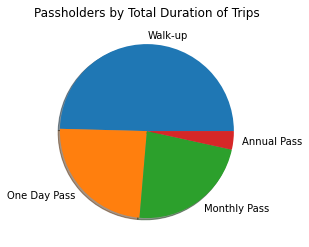

In [84]:
y = duration_memtype.sum_of_duration
mylabels = duration_memtype.passholder_type
#myexplode = [0, 0.2, 0.2, 0.2]

#plt.pie(y, labels = mylabels, explode = myexplode, shadow = True)
plt.pie(y, labels = mylabels, shadow = True)
plt.title('Passholders by Total Duration of Trips', fontsize= 12)
plt.show()

In [41]:
# check the dataframe
df_mb_la.columns


Index(['Station_ID', 'Station_Name', 'Go_live_date', 'Region', 'Status',
       'trip_id', 'duration', 'start_time', 'end_time', 'start_station',
       'start_lat', 'start_lon', 'end_station', 'end_lat', 'end_lon',
       'bike_id', 'plan_duration', 'trip_route_category', 'passholder_type',
       'bike_type', 'year', 'quarter', 'month', 'day_of_month', 'week',
       'day_of_week', 'weekday', 'holiday'],
      dtype='object')

In [48]:
df_mb_la.shape

(222351, 28)

In [43]:
df_mb_la.head()

Station_ID     Station_Name Go_live_date Region  Status      trip_id  \
0      3000.0  Virtual Station     7/7/2016    NaN  Active  151901291.0   
1      3005.0     7th & Flower     7/7/2016   DTLA  Active  151875290.0   
2      3005.0     7th & Flower     7/7/2016   DTLA  Active  151876311.0   
3      3005.0     7th & Flower     7/7/2016   DTLA  Active  151882598.0   
4      3005.0     7th & Flower     7/7/2016   DTLA  Active  151885191.0   

   duration          start_time            end_time  start_station  start_lat  \
0       1.0 2021-01-05 20:53:00 2021-01-05 20:54:00         3000.0        NaN   
1      29.0 2021-01-05 07:10:00 2021-01-05 07:39:00         3005.0    34.0485   
2      22.0 2021-01-05 08:01:00 2021-01-05 08:23:00         3005.0    34.0485   
3      22.0 2021-01-05 12:39:00 2021-01-05 13:01:00         3005.0    34.0485   
4       3.0 2021-01-05 15:07:00 2021-01-05 15:10:00         3005.0    34.0485   

    start_lon  end_station   end_lat     end_lon bike_id  plan_duration  \
0         NaN       4500.0  34.17210 -118.361816   15179           30.0   
1 -118.258537       4275.0  34.01252 -118.285896   20173           30.0   
2 -118.258537       4387.0  34.03352 -118.241837   12382           30.0   
3 -118.258537       3075.0  34.04211 -118.256187    6631           30.0   
4 -118.258537       3006.0  34.04554 -118.256668   18957          365.0   

  trip_route_category passholder_type bike_type    year  quarter  month  \
0             One Way    Monthly Pass     smart  2021.0      1.0    1.0   
1             One Way    Monthly Pass  standard  2021.0      1.0    1.0   
2             One Way    Monthly Pass  standard  2021.0      1.0    1.0   
3             One Way    Monthly Pass  standard  2021.0      1.0    1.0   
4             One Way     Annual Pass  electric  2021.0      1.0    1.0   

   day_of_month  week day_of_week  weekday  holiday  
0           5.0   1.0         Tue      3.0        0  
1           5.0   1.0         Tue      3.0        0  
2           5.0   1.0         Tue      3.0        0  
3           5.0   1.0         Tue      3.0        0  
4           5.0   1.0         Tue      3.0        0

In [47]:
# get a count of trips by bike type and station name
feature = (df_mb_la.groupby(['Station_Name','bike_type'])['trip_id'].count().sort_values(ascending=False)
                    .head(20).reset_index(name='count'))

# print usage
feature

Station_Name bike_type  count
0                Ocean Front Walk & Navy  standard   9132
1        Ocean Front Walk & North Venice  standard   7713
2   Downtown Santa Monica E Line Station  standard   6734
3              Toes Beach at Culver Blvd  standard   5236
4       Dockweiler Beach at Imperial Hwy  standard   3440
5                           7th & Flower  standard   3429
6                           7th & Flower  electric   3349
7                        Windward & Main  standard   3076
8                            Rose & Main  standard   2852
9                 Pacific & North Venice  standard   2807
10                        Figueroa & 8th  standard   2557
11                          7th & Spring  standard   2356
12             Union Station West Portal  standard   2096
13                           Grand & 8th  standard   1965
14                        Main & Winston  standard   1887
15                  Abbot Kinney & Cadiz  standard   1708
16  Downtown Santa Monica E Line Station  electric   1707
17                        Broadway & 3rd  standard   1596
18                           Hope & 11th  standard   1506
19                            Main & 1st  standard   1504

### Model the data

In [49]:
df_mb_la.head()

Station_ID     Station_Name Go_live_date Region  Status      trip_id  \
0      3000.0  Virtual Station     7/7/2016    NaN  Active  151901291.0   
1      3005.0     7th & Flower     7/7/2016   DTLA  Active  151875290.0   
2      3005.0     7th & Flower     7/7/2016   DTLA  Active  151876311.0   
3      3005.0     7th & Flower     7/7/2016   DTLA  Active  151882598.0   
4      3005.0     7th & Flower     7/7/2016   DTLA  Active  151885191.0   

   duration          start_time            end_time  start_station  start_lat  \
0       1.0 2021-01-05 20:53:00 2021-01-05 20:54:00         3000.0        NaN   
1      29.0 2021-01-05 07:10:00 2021-01-05 07:39:00         3005.0    34.0485   
2      22.0 2021-01-05 08:01:00 2021-01-05 08:23:00         3005.0    34.0485   
3      22.0 2021-01-05 12:39:00 2021-01-05 13:01:00         3005.0    34.0485   
4       3.0 2021-01-05 15:07:00 2021-01-05 15:10:00         3005.0    34.0485   

    start_lon  end_station   end_lat     end_lon bike_id  plan_duration  \
0         NaN       4500.0  34.17210 -118.361816   15179           30.0   
1 -118.258537       4275.0  34.01252 -118.285896   20173           30.0   
2 -118.258537       4387.0  34.03352 -118.241837   12382           30.0   
3 -118.258537       3075.0  34.04211 -118.256187    6631           30.0   
4 -118.258537       3006.0  34.04554 -118.256668   18957          365.0   

  trip_route_category passholder_type bike_type    year  quarter  month  \
0             One Way    Monthly Pass     smart  2021.0      1.0    1.0   
1             One Way    Monthly Pass  standard  2021.0      1.0    1.0   
2             One Way    Monthly Pass  standard  2021.0      1.0    1.0   
3             One Way    Monthly Pass  standard  2021.0      1.0    1.0   
4             One Way     Annual Pass  electric  2021.0      1.0    1.0   

   day_of_month  week day_of_week  weekday  holiday  
0           5.0   1.0         Tue      3.0        0  
1           5.0   1.0         Tue      3.0        0  
2           5.0   1.0         Tue      3.0        0  
3           5.0   1.0         Tue      3.0        0  
4           5.0   1.0         Tue      3.0        0

### Version 2 Model

In [51]:
df_outgoing = pd.DataFrame()
df_outgoing['station'] = df_mb_la['start_station'].value_counts().head().index
df_outgoing['number_of_starts']=df_mb_la['start_station'].value_counts().head().values

In [52]:
# preview
df_outgoing

station  number_of_starts
0   4214.0             10579
1   4210.0              8915
2   4215.0              8442
3   3005.0              6778
4   4543.0              5902

In [54]:
# check the columns
df_mb_la.columns

Index(['Station_ID', 'Station_Name', 'Go_live_date', 'Region', 'Status',
       'trip_id', 'duration', 'start_time', 'end_time', 'start_station',
       'start_lat', 'start_lon', 'end_station', 'end_lat', 'end_lon',
       'bike_id', 'plan_duration', 'trip_route_category', 'passholder_type',
       'bike_type', 'year', 'quarter', 'month', 'day_of_month', 'week',
       'day_of_week', 'weekday', 'holiday'],
      dtype='object')

In [55]:
# bring in date field for outgoing_df
df_mb_la['date'] = df_mb_la['start_time'].dt.date

In [61]:
df_mb_la.head()

Station_ID     Station_Name Go_live_date Region  Status      trip_id  \
0      3000.0  Virtual Station     7/7/2016    NaN  Active  151901291.0   
1      3005.0     7th & Flower     7/7/2016   DTLA  Active  151875290.0   
2      3005.0     7th & Flower     7/7/2016   DTLA  Active  151876311.0   
3      3005.0     7th & Flower     7/7/2016   DTLA  Active  151882598.0   
4      3005.0     7th & Flower     7/7/2016   DTLA  Active  151885191.0   

   duration          start_time            end_time  start_station  start_lat  \
0       1.0 2021-01-05 20:53:00 2021-01-05 20:54:00         3000.0        NaN   
1      29.0 2021-01-05 07:10:00 2021-01-05 07:39:00         3005.0    34.0485   
2      22.0 2021-01-05 08:01:00 2021-01-05 08:23:00         3005.0    34.0485   
3      22.0 2021-01-05 12:39:00 2021-01-05 13:01:00         3005.0    34.0485   
4       3.0 2021-01-05 15:07:00 2021-01-05 15:10:00         3005.0    34.0485   

    start_lon  end_station   end_lat     end_lon bike_id  plan_duration  \
0         NaN       4500.0  34.17210 -118.361816   15179           30.0   
1 -118.258537       4275.0  34.01252 -118.285896   20173           30.0   
2 -118.258537       4387.0  34.03352 -118.241837   12382           30.0   
3 -118.258537       3075.0  34.04211 -118.256187    6631           30.0   
4 -118.258537       3006.0  34.04554 -118.256668   18957          365.0   

  trip_route_category passholder_type bike_type    year  quarter  month  \
0             One Way    Monthly Pass     smart  2021.0      1.0    1.0   
1             One Way    Monthly Pass  standard  2021.0      1.0    1.0   
2             One Way    Monthly Pass  standard  2021.0      1.0    1.0   
3             One Way    Monthly Pass  standard  2021.0      1.0    1.0   
4             One Way     Annual Pass  electric  2021.0      1.0    1.0   

   day_of_month  week day_of_week  weekday  holiday        date  
0           5.0   1.0         Tue      3.0        0  2021-01-05  
1           5.0   1.0         Tue      3.0        0  2021-01-05  
2           5.0   1.0         Tue      3.0        0  2021-01-05  
3           5.0   1.0         Tue      3.0        0  2021-01-05  
4           5.0   1.0         Tue      3.0        0  2021-01-05

In [59]:
df_mb_la.columns

Index(['Station_ID', 'Station_Name', 'Go_live_date', 'Region', 'Status',
       'trip_id', 'duration', 'start_time', 'end_time', 'start_station',
       'start_lat', 'start_lon', 'end_station', 'end_lat', 'end_lon',
       'bike_id', 'plan_duration', 'trip_route_category', 'passholder_type',
       'bike_type', 'year', 'quarter', 'month', 'day_of_month', 'week',
       'day_of_week', 'weekday', 'holiday', 'date'],
      dtype='object')

In [62]:
df_outgoing = pd.DataFrame()
df_outgoing = df_mb_la.groupby(['Station_ID', 'Status','year', 'quarter', 'month','day_of_month', 'week',
                                'day_of_week', 'weekday', 'holiday'])['trip_id'].count().reset_index()
df_outgoing.rename(columns = {'trip_id': 'outgoingbikes'}, inplace = True)
df_outgoing.head()

Station_ID  Status    year  quarter  month  day_of_month  week day_of_week  \
0      3000.0  Active  2021.0      1.0    1.0           5.0   1.0         Tue   
1      3000.0  Active  2021.0      1.0    1.0           6.0   1.0         Wed   
2      3000.0  Active  2021.0      1.0    1.0           8.0   1.0         Fri   
3      3000.0  Active  2021.0      1.0    1.0          12.0   2.0         Tue   
4      3000.0  Active  2021.0      1.0    1.0          15.0   2.0         Fri   

   weekday  holiday  outgoingbikes  
0      3.0        0              1  
1      4.0        0              1  
2      6.0        0              1  
3      3.0        0              1  
4      6.0        0              1

In [63]:
df_outgoing

Station_ID  Status    year  quarter  month  day_of_month  week  \
0          3000.0  Active  2021.0      1.0    1.0           5.0   1.0   
1          3000.0  Active  2021.0      1.0    1.0           6.0   1.0   
2          3000.0  Active  2021.0      1.0    1.0           8.0   1.0   
3          3000.0  Active  2021.0      1.0    1.0          12.0   2.0   
4          3000.0  Active  2021.0      1.0    1.0          15.0   2.0   
...           ...     ...     ...      ...    ...           ...   ...   
53131      4587.0  Active  2021.0      4.0   12.0          24.0  51.0   
53132      4587.0  Active  2021.0      4.0   12.0          26.0  52.0   
53133      4587.0  Active  2021.0      4.0   12.0          27.0  52.0   
53134      4587.0  Active  2021.0      4.0   12.0          28.0  52.0   
53135      4587.0  Active  2021.0      4.0   12.0          31.0  52.0   

      day_of_week  weekday  holiday  outgoingbikes  
0             Tue      3.0        0              1  
1             Wed      4.0        0              1  
2             Fri      6.0        0              1  
3             Tue      3.0        0              1  
4             Fri      6.0        0              1  
...           ...      ...      ...            ...  
53131         Fri      6.0        0              1  
53132         Sun      1.0        1              2  
53133         Mon      2.0        0              1  
53134         Tue      3.0        0              1  
53135         Fri      6.0        0              1  

[53136 rows x 11 columns]

In [65]:
# create dummy variables for categorical variables - Station_Id, day of week and status
df_final_mb = pd.DataFrame()
df_final_mb = pd.get_dummies(df_outgoing)
df_final_mb.head()

Station_ID    year  quarter  month  day_of_month  week  weekday  holiday  \
0      3000.0  2021.0      1.0    1.0           5.0   1.0      3.0        0   
1      3000.0  2021.0      1.0    1.0           6.0   1.0      4.0        0   
2      3000.0  2021.0      1.0    1.0           8.0   1.0      6.0        0   
3      3000.0  2021.0      1.0    1.0          12.0   2.0      3.0        0   
4      3000.0  2021.0      1.0    1.0          15.0   2.0      6.0        0   

   outgoingbikes  Status_Active  day_of_week_Fri  day_of_week_Mon  \
0              1              1                0                0   
1              1              1                0                0   
2              1              1                1                0   
3              1              1                0                0   
4              1              1                1                0   

   day_of_week_Sat  day_of_week_Sun  day_of_week_Thu  day_of_week_Tue  \
0                0                0                0                1   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                1   
4                0                0                0                0   

   day_of_week_Wed  
0                0  
1                1  
2                0  
3                0  
4                0

In [66]:
df_final_mb.head

<bound method NDFrame.head of        Station_ID    year  quarter  month  day_of_month  week  weekday  \
0          3000.0  2021.0      1.0    1.0           5.0   1.0      3.0   
1          3000.0  2021.0      1.0    1.0           6.0   1.0      4.0   
2          3000.0  2021.0      1.0    1.0           8.0   1.0      6.0   
3          3000.0  2021.0      1.0    1.0          12.0   2.0      3.0   
4          3000.0  2021.0      1.0    1.0          15.0   2.0      6.0   
...           ...     ...      ...    ...           ...   ...      ...   
53131      4587.0  2021.0      4.0   12.0          24.0  51.0      6.0   
53132      4587.0  2021.0      4.0   12.0          26.0  52.0      1.0   
53133      4587.0  2021.0      4.0   12.0          27.0  52.0      2.0   
53134      4587.0  2021.0      4.0   12.0          28.0  52.0      3.0   
53135      4587.0  2021.0      4.0   12.0          31.0  52.0      6.0   

       holiday  outgoingbikes  Status_Active  day_of_week_Fri  \
0            0  

In [67]:
df_final_mb.shape

(53136, 17)

In [68]:
df_final_mb.columns

Index(['Station_ID', 'year', 'quarter', 'month', 'day_of_month', 'week',
       'weekday', 'holiday', 'outgoingbikes', 'Status_Active',
       'day_of_week_Fri', 'day_of_week_Mon', 'day_of_week_Sat',
       'day_of_week_Sun', 'day_of_week_Thu', 'day_of_week_Tue',
       'day_of_week_Wed'],
      dtype='object')

In [69]:
# defining independant variables
df_features = df_final_mb[['year', 'quarter', 'month','day_of_month', 'week', 'weekday', 'holiday', 'Status_Active',
                         'day_of_week_Fri', 'day_of_week_Mon', 'day_of_week_Sat','day_of_week_Sun', 'day_of_week_Thu', 
                         'day_of_week_Tue','day_of_week_Wed']]

df_target = df_final_mb['outgoingbikes']

In [70]:
# ensuring lenghts of the features and targets
print(len(df_features))
print(len(df_target))

53136
53136


In [71]:
from sklearn.model_selection import train_test_split
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_features,
                                df_target,
                                test_size=0.30,
                                random_state=42)

In [72]:
X_train.head()

year  quarter  month  day_of_month  week  weekday  holiday  \
49776  2021.0      3.0    7.0          21.0  29.0      4.0        0   
22902  2021.0      3.0    9.0          29.0  39.0      4.0        0   
50744  2021.0      1.0    1.0           4.0   1.0      2.0        0   
25893  2021.0      2.0    6.0          28.0  26.0      2.0        0   
13082  2021.0      1.0    2.0          21.0   8.0      1.0        0   

       Status_Active  day_of_week_Fri  day_of_week_Mon  day_of_week_Sat  \
49776              1                0                0                0   
22902              1                0                0                0   
50744              1                0                1                0   
25893              1                0                1                0   
13082              1                0                0                0   

       day_of_week_Sun  day_of_week_Thu  day_of_week_Tue  day_of_week_Wed  
49776                0                0                0                1  
22902                0                0                0                1  
50744                0                0                0                0  
25893                0                0                0                0  
13082                1                0                0                0

In [73]:
y_train.head()

49776    1
22902    4
50744    1
25893    2
13082    2
Name: outgoingbikes, dtype: int64

In [74]:
# SKLearn's StandardScaler
from sklearn.preprocessing import StandardScaler

# Rescale X_train and X_test
scaler = StandardScaler()
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

#### Decision Tree Regressor Model

In [78]:
# decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dtregressor = DecisionTreeRegressor(random_state = 0)
dtregressor.fit(rescaledX_train, y_train)

# predicting results for training data set
y_pred_train = dtregressor.predict(rescaledX_train)

# predicting results for test data
y_pred_test = dtregressor.predict(rescaledX_test)

# residuals
#residuals_in_train = y_train - y_pred_train
#residuals_in_test = y_test - y_pred_test

In [101]:
# stats from decision tree regressor TRAIN
# mean absolute error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Train data - mean absolute error ", mean_absolute_error(y_train, y_pred_train))

# mean squared error
train_MSE = mean_squared_error(y_train, y_pred_train)
print("Train data - mean squared error ", train_MSE)

# R² score
print("Train data - R-square ", r2_score(y_train, y_pred_train))

# root mean square error RMSE

train_RMSE = math.sqrt(train_MSE)
print("Train root mean square error (RMSE):", train_RMSE)

Train data - mean absolute error  2.895280455595285
Train data - mean squared error  29.72725744600127
Train data - R-square  0.06376146060722698
Train root mean square error (RMSE): 5.452270852223069


In [102]:
# mean absolute error TEST
print("Test data - mean absolute Error is : ", mean_absolute_error(y_test, y_pred_test))

# mean squared error
test_MSE = mean_squared_error(y_test, y_pred_test)
print("Test data - mean squared Error : ", MSE)

# R² score
print("Test data - R-square  : ", r2_score(y_test, y_pred_test))

# root mean square error RMSE

test_RMSE = math.sqrt(test_MSE)
print("Test root mean square error (RMSE):", RMSE)

Test data - mean absolute Error is :  2.8779180863315355
Test data - mean squared Error :  29.19591490120528
Test data - R-square  :  0.05024615514122899
Test root mean square error (RMSE): 5.4033244304969585


In [91]:
print(dtregressor.score(X_test, y_test))

-0.1841916661007319


C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


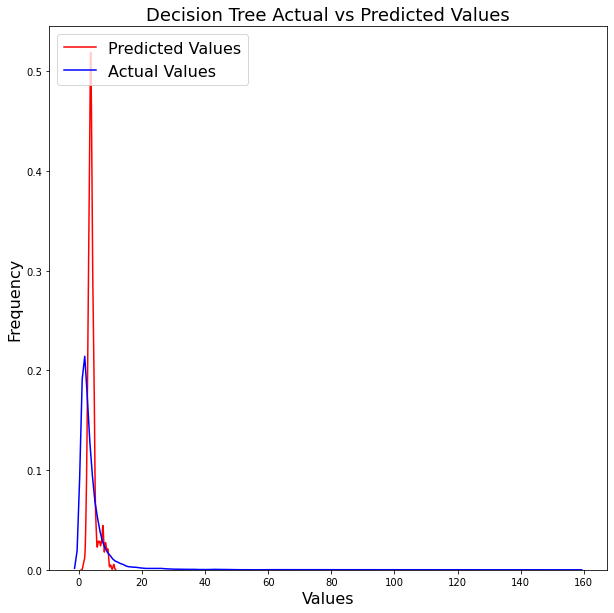

In [92]:
# visualising the decision tree regression results 
plt.figure(figsize=(10,10))

sns.distplot(y_pred_test, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Decision Tree Actual vs Predicted Values', fontsize = 18)
plt.xlabel('Values', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16)
plt.legend(loc = 'upper left', fontsize = 16)
plt.ticklabel_format(style='plain', axis='x')

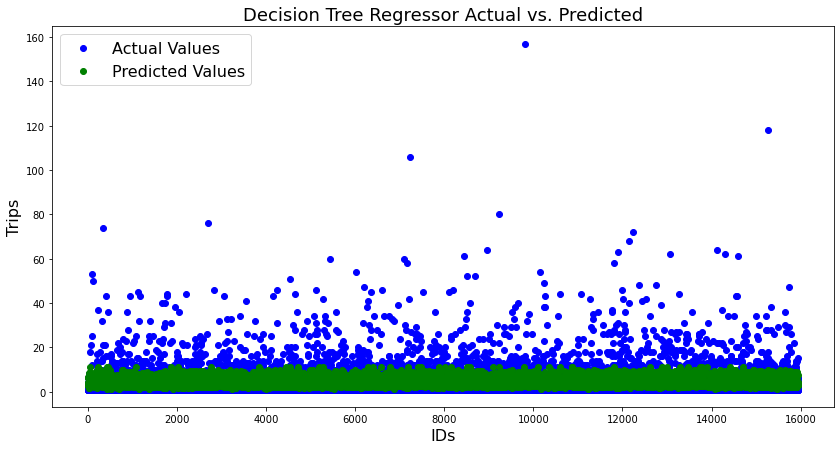

In [93]:
# 
plt.figure(figsize=(14,7))
plt.scatter(range(len(y_test)), y_test, color='b', label='Actual Values')
plt.scatter(range(len(y_pred_test)), y_pred_test, color='g', label='Predicted Values')
plt.title('Decision Tree Regressor Actual vs. Predicted', fontsize = 18)
plt.xlabel('IDs', fontsize = 16)
plt.ylabel('Trips', fontsize = 16)
plt.legend(loc = 'upper left', fontsize = 16)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

#### Random Forest Regressor

In [94]:
# random forest regressor
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=1000,
                                    criterion='mse',
                                    random_state=1,
                                    n_jobs=-1)

rf_regressor.fit(X_train, y_train)

# predicting a new result for test data 
rf_y_pred_train = rf_regressor.predict(X_train)


# predicting a new result for test data 
rf_y_pred_test = rf_regressor.predict(X_test)

In [103]:
# train dataset

# mean bbsolute error
print("Train data - Mean Absolute Error is : ", mean_absolute_error(y_train, rf_y_pred_train))

# mean squared error
rfmse = mean_squared_error(y_train, rf_y_pred_train)
print("Train data - Mean Squared Error : ", rfmse )

# R²
print("Train data - R-square : ", r2_score(y_train, rf_y_pred_train))

# root mean squre error (RMSE)
rfrmse = math.sqrt(rfmse)
print("Train root mean square error (RMSE):", rfrmse)

Train data - Mean Absolute Error is :  2.895329954273897
Train data - Mean Squared Error :  29.72749614072846
Train data - R-square :  0.06375394308889726
Train root mean square error (RMSE): 5.452292741657262


In [104]:
# test dataset

# mean bbsolute error
print("Test data - Mean Absolute Error is : ", mean_absolute_error(y_test, rf_y_pred_test))

# mean squared error
rftrain_mse = mean_squared_error(y_test, rf_y_pred_test)
print("Test data - Mean Squared Error : ", )

# R²
print("Test data - R-square: ", r2_score(y_test, rf_y_pred_test))

# root mean squre error (RMSE)
rftest_rmse = math.sqrt(rftrain_mse)
print("Test root mean square error (RMSE):", rftest_rmse)

Test data - Mean Absolute Error is :  2.8778780818089107
Test data - Mean Squared Error : 
Test data - R-square:  0.05024700236639745
Test root mean square error (RMSE): 5.403322020486462


C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Tushar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


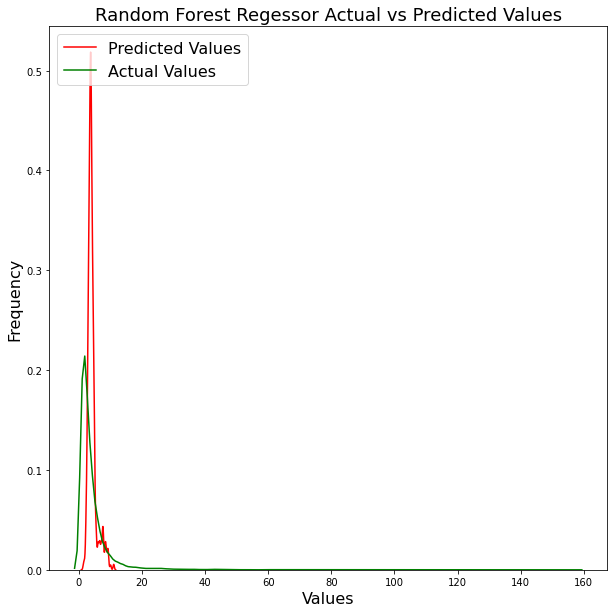

In [97]:
# visual results of the random forest
plt.figure(figsize=(10,10))

sns.distplot(rf_y_pred_test, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'g', label = 'Actual Values')
plt.title('Random Forest Regessor Actual vs Predicted Values', fontsize = 18)
plt.xlabel('Values', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16)
plt.legend(loc = 'upper left', fontsize = 16)
plt.ticklabel_format(style='plain', axis='x')

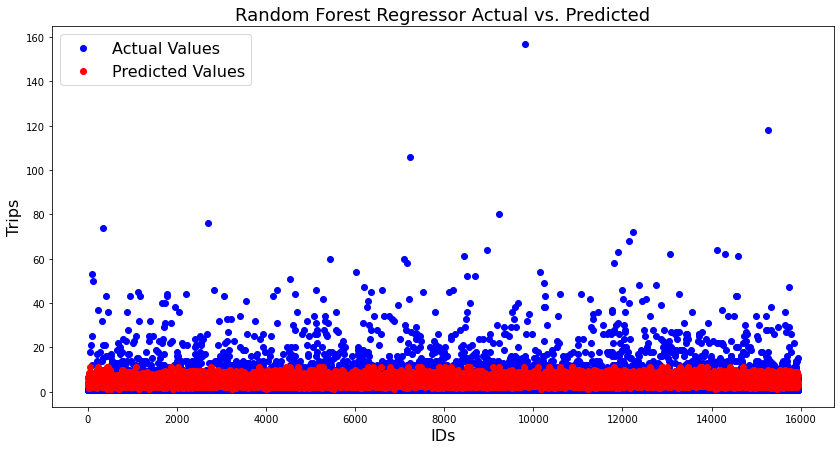

In [99]:
plt.figure(figsize=(14,7))
plt.scatter(range(len(y_test)), y_test, color='b', label='Actual Values')
plt.scatter(range(len(rf_y_pred_test)), rf_y_pred_test, color='r', label='Predicted Values')
plt.title('Random Forest Regressor Actual vs. Predicted', fontsize = 18)
plt.xlabel('IDs', fontsize = 16)
plt.ylabel('Trips', fontsize = 16)
plt.legend(loc = 'upper left', fontsize = 16)
plt.ticklabel_format(style='plain', axis='x')
plt.show()